In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd 
import torch 
import numpy as np 
import seaborn as sns 
from torch import nn 
import time 
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline 
from sklearn.metrics import accuracy_score,classification_report,plot_confusion_matrix 
from matplotlib import pyplot as plt 
import pickle 

In [ ]:
!cp /content/drive/MyDrive/Viettel/train.csv /content/
!cp /content/drive/MyDrive/Viettel/test.csv /content/

In [ ]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [ ]:
train

,text,label
0,không du_khách vùng_biển xảy sóng_thần trao_đổ...,0
1,vua cầu_treo mới 42 tuổi anh phạm ngọc quý hưn...,0
2,chuẩn_bị hàng độc chợ tết người dân sa_đéc man...,0
3,lên lộ_trình triển_khai việc phân_giới cắm_mốc...,0
4,tàu phương nam 02 đâm chìm trên biển 0 giờ 30 ...,0
...,...,...
33754,mua máy xách tay được tặng ipod 1 trong chương...,9
33755,vietnam computerworld expo 2004 sôi_động mới_m...,9
33756,lĩnh hack phòng_thí_nghiệm hạt_nhân của hôm_qu...,9
33757,xử_lý file trùng_lặp bằng xplorer2 lite cứng n...,9


In [ ]:
val=train[train.label==0].sample(int(len(train[train.label==0])*0.2))
for i in range(1,10,1):
  temp=train[train.label==i]
  temp1=temp.sample(int(len(temp)*0.2))
  val=pd.concat([val,temp1],axis=0)

In [ ]:
data_train=train[~train.index.isin(val.index)]
data_val=val
data_train=data_train.sample(frac=1)
data_val=data_val.sample(frac=1)

In [ ]:
print(data_train.shape)
print(data_val.shape)

(27012, 2)
(6747, 2)


In [ ]:
y_train=data_train.label.values
y_val=data_val.label.values
y_test=test.label.values

# Naive Bayes

In [ ]:
model=Pipeline([
                ('vect',CountVectorizer(ngram_range=(1,1),max_features=None)),
                #('tfidf',TfidfTransformer()),
                ('clf',MultinomialNB())
])
model.fit(data_train.text.values.tolist(),y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [ ]:
y_pred_val_bayes=model.predict(data_val.text.values.tolist())
accuracy_score_validation_bayes=accuracy_score(y_pred_val_bayes,y_val)
print(accuracy_score_validation_bayes)

0.8872091299836965


In [ ]:
print(classification_report(y_val,y_pred_val_bayes))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81      1043
           1       0.91      0.90      0.91       616
           2       0.89      0.89      0.89       579
           3       0.82      0.89      0.86       510
           4       0.89      0.75      0.81       364
           5       0.81      0.85      0.83       631
           6       0.88      0.92      0.90       676
           7       0.99      0.95      0.97      1059
           8       0.91      0.93      0.92       773
           9       0.94      0.91      0.92       496

    accuracy                           0.89      6747
   macro avg       0.89      0.88      0.88      6747
weighted avg       0.89      0.89      0.89      6747



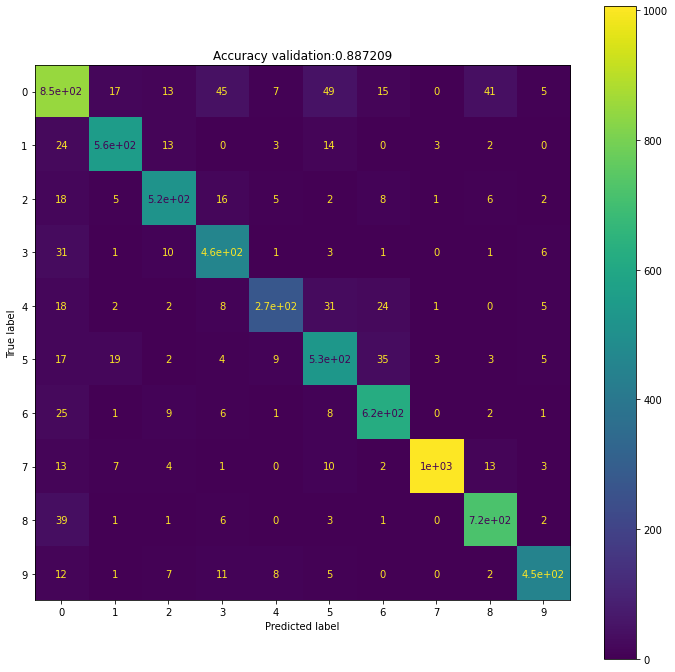

In [ ]:
fig,ax=plt.subplots(figsize=(12,12))
plot_confusion_matrix(model,data_val.text.values.tolist(),y_val,ax=ax)
plt.title("Accuracy validation:{:2f}".format(accuracy_score_validation_bayes))
plt.savefig('/content/drive/MyDrive/Viettel/naive_bayes_validation.png')

In [ ]:
y_pred_test_bayes=model.predict(test.text.values.tolist())
accuracy_score_test_bayes=accuracy_score(y_test,y_pred_test_bayes)
print(accuracy_score_test_bayes)


0.895797351755901


In [ ]:
print(classification_report(y_test,y_pred_test_bayes))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84      7567
           1       0.91      0.93      0.92      6250
           2       0.93      0.91      0.92      6716
           3       0.90      0.88      0.89      5276
           4       0.84      0.71      0.77      2096
           5       0.69      0.74      0.71      2036
           6       0.93      0.92      0.93      5417
           7       0.99      0.95      0.97      6667
           8       0.87      0.92      0.89      3788
           9       0.94      0.91      0.92      4560

    accuracy                           0.90     50373
   macro avg       0.88      0.87      0.88     50373
weighted avg       0.90      0.90      0.90     50373



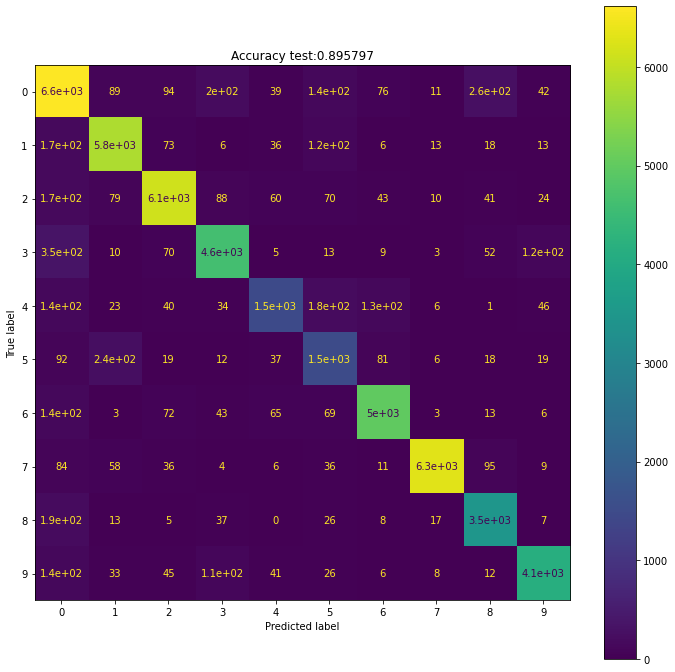

In [ ]:
fig,ax=plt.subplots(figsize=(12,12))
plot_confusion_matrix(model,test.text.values.tolist(),y_test,ax=ax)
plt.title("Accuracy test:{:2f}".format(accuracy_score_test_bayes))
plt.savefig('/content/drive/MyDrive/Viettel/naive_bayes_test.png')

In [ ]:
with open('/content/drive/MyDrive/Viettel/naive_bayes.pickle','wb') as file:
  pickle.dump(model,file,protocol=pickle.HIGHEST_PROTOCOL)

# KNN

In [ ]:
model_knn=Pipeline([
                    ('vect',CountVectorizer(ngram_range=(1,1),max_features=None)),
                    ('svd',TruncatedSVD(n_components=300,random_state=42)),
                    ('clf',KNeighborsClassifier(n_neighbors=10))
])
model_knn.fit(data_train.text.values.tolist(),y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('svd',
                 TruncatedSVD(algorithm='randomized', n_components=300,
                              n_iter=5, random_state=42, tol=0.0)),
                ('clf',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,

In [ ]:
y_pred_val_knn=model_knn.predict(data_val.text.values.tolist())
accuracy_score_val_knn=accuracy_score(y_val,y_pred_val_knn)
print(accuracy_score_val_knn)

0.7880539499036608


In [ ]:
y_pred_test_knn=model_knn.predict(test.text.values.tolist())
accuracy_score_test_knn=accuracy_score(y_test,y_pred_test_knn)
print(accuracy_score_test_knn)

0.7888352887459552


In [ ]:
print(classification_report(y_pred_val_knn,y_val))

              precision    recall  f1-score   support

           0       0.76      0.65      0.70      1229
           1       0.85      0.68      0.76       763
           2       0.77      0.77      0.77       585
           3       0.72      0.80      0.76       460
           4       0.64      0.72      0.68       323
           5       0.71      0.78      0.74       574
           6       0.84      0.82      0.83       692
           7       0.90      0.99      0.94       961
           8       0.77      0.90      0.83       666
           9       0.78      0.78      0.78       494

    accuracy                           0.79      6747
   macro avg       0.77      0.79      0.78      6747
weighted avg       0.79      0.79      0.79      6747



In [ ]:
print(classification_report(y_pred_test_knn,y_test))

              precision    recall  f1-score   support

           0       0.80      0.67      0.73      9007
           1       0.87      0.75      0.80      7246
           2       0.80      0.82      0.81      6530
           3       0.71      0.85      0.77      4398
           4       0.56      0.57      0.57      2033
           5       0.39      0.48      0.43      1631
           6       0.84      0.86      0.85      5335
           7       0.90      0.97      0.94      6161
           8       0.78      0.84      0.81      3528
           9       0.81      0.82      0.81      4504

    accuracy                           0.79     50373
   macro avg       0.74      0.76      0.75     50373
weighted avg       0.79      0.79      0.79     50373



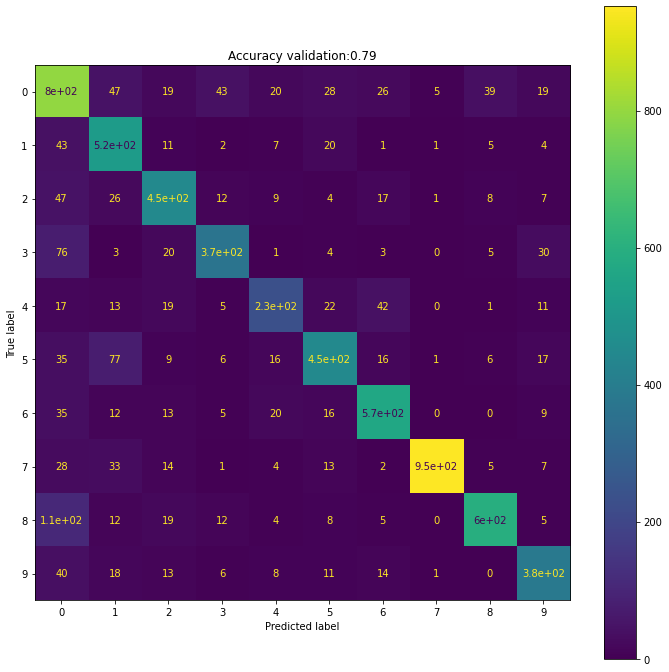

In [ ]:
fig,ax=plt.subplots(figsize=(12,12))
plot_confusion_matrix(model_knn,data_val.text.values.tolist(),y_val,ax=ax)
plt.title("Accuracy validation:{:.2f}".format(accuracy_score_val_knn))
plt.savefig('/content/drive/MyDrive/Viettel/knn_val.png')

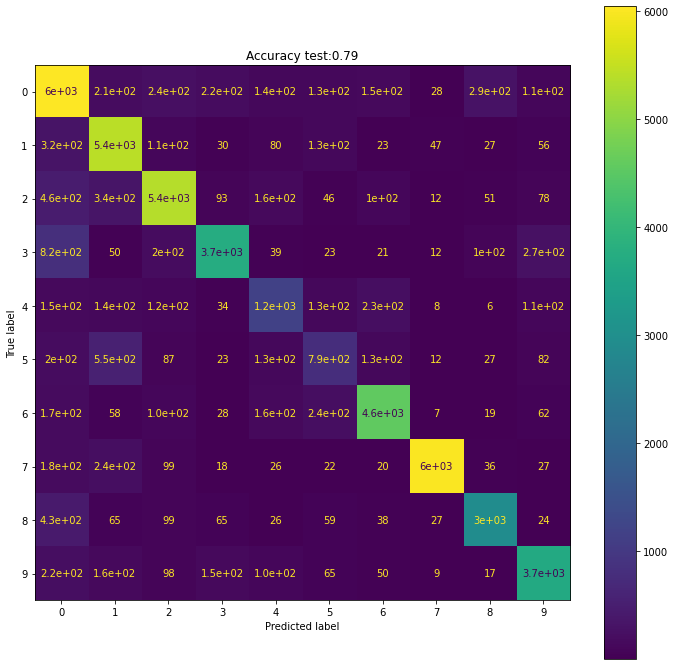

In [ ]:
fig,ax=plt.subplots(figsize=(12,12))
plot_confusion_matrix(model_knn,test.text.values.tolist(),y_test,ax=ax)
plt.title("Accuracy test:{:.2f}".format(accuracy_score_test_knn))
plt.savefig('/content/drive/MyDrive/Viettel/knn_test.png')